# Genrify Project
## Music genre prediction

Henri Toussaint<br>
Victor Saint Guilhem<br>
Benoît Lafon<br>

The project sets out to predict the genre of a music using the Spotify API, which provides audio features for each tracks. To collect the tracks, we used a recommandation function with a genre seed. We handpicked 20 genres in order to best represent tracks, and from each genre, we collected 100 tracks.

# Data Loading Using Pandas

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("music_collection.csv")
pd_attributes = data.loc[:,'acousticness':'valence']
attributes = np.array(pd_attributes)

print('Number of instances: ' + str(data.shape[0]))
print('Number of attributes: ' + str(pd_attributes.shape[1]))
print('Attributes:')
for i in pd_attributes.columns.values:
    print('\t'+str(i))

Number of instances: 2000
Number of attributes: 13
Attributes:
	acousticness
	danceability
	duration_ms
	energy
	instrumentalness
	key
	liveness
	loudness
	mode
	speechiness
	tempo
	time_signature
	valence


In [249]:
data.head()

,artist,track,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre
0,fun.,Some Nights,0.01780,0.672,277040,0.738,0.000068,0,0.0927,-7.045,1,0.0506,107.938,4,0.401,alternative
1,Ra Ra Riot,Boy,0.03640,0.579,190907,0.861,0.007960,2,0.4030,-5.542,1,0.0467,161.959,4,0.793,alternative
2,Nirvana,Lithium,0.00145,0.687,257133,0.685,0.000000,7,0.0657,-5.854,1,0.0367,123.147,4,0.371,alternative
3,Linkin Park,Faint,0.11700,0.553,164040,0.981,0.000000,4,0.0631,-3.634,1,0.1310,135.085,4,0.577,alternative
4,Red Hot Chili Peppers,Can't Stop,0.02010,0.620,269000,0.934,0.000000,4,0.1900,-3.427,0,0.0411,91.234,4,0.882,alternative


# Target variable

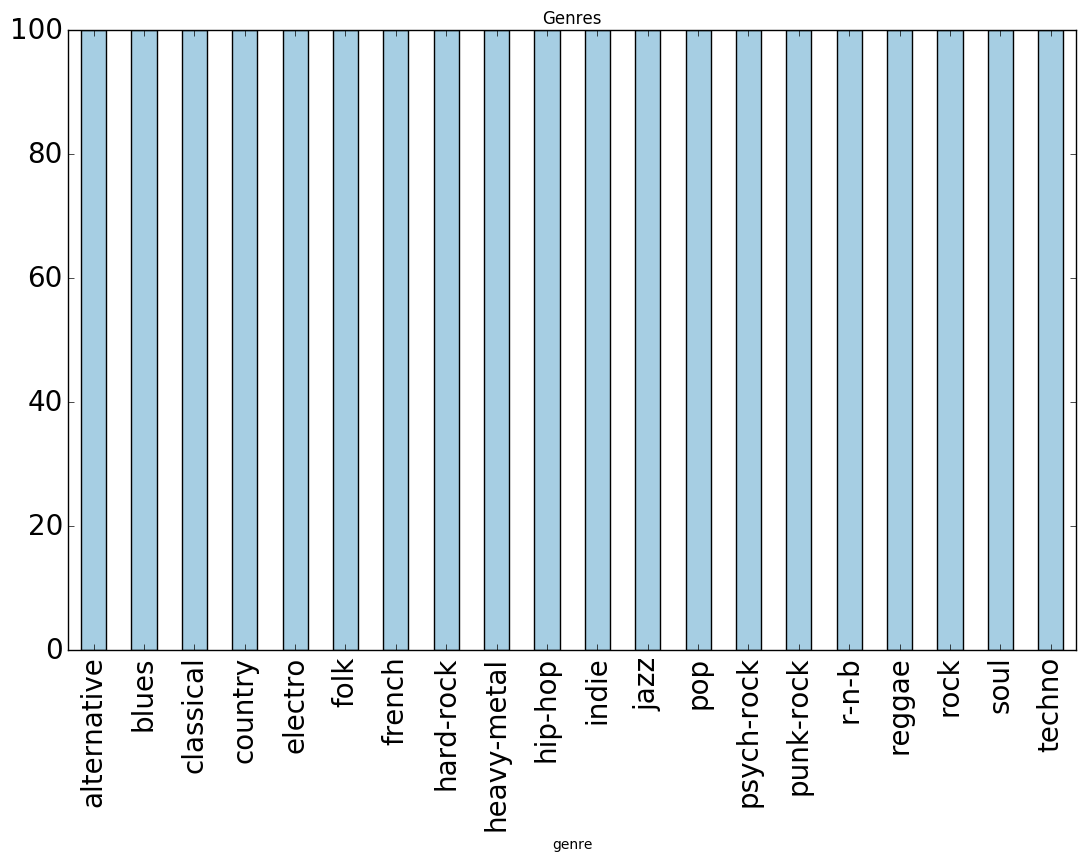

In [250]:
#plt.figure('Genres')
%matplotlib inline
#data['genre'].astype("category")
count_genre = data.groupby("genre").size()
count_genre.plot(kind='bar',title='Genres',figsize=[13,8], colormap='Paired',fontsize=20)


# Target Variable vectorized

In [251]:
pd_target_vect = pd.get_dummies(data['genre'])
pd_target_vect.head()

,alternative,blues,classical,country,electro,folk,french,hard-rock,heavy-metal,hip-hop,indie,jazz,pop,psych-rock,punk-rock,r-n-b,reggae,rock,soul,techno
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [252]:
target_vect = np.array(pd_target_vect)
print('Dimension: ' + str(target_vect.shape))
print(repr(target_vect))

Dimension: (2000, 20)
array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])


# Acousticness attribute

A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic, i.e. not electronically amplified.

<IPython.core.display.Javascript object>


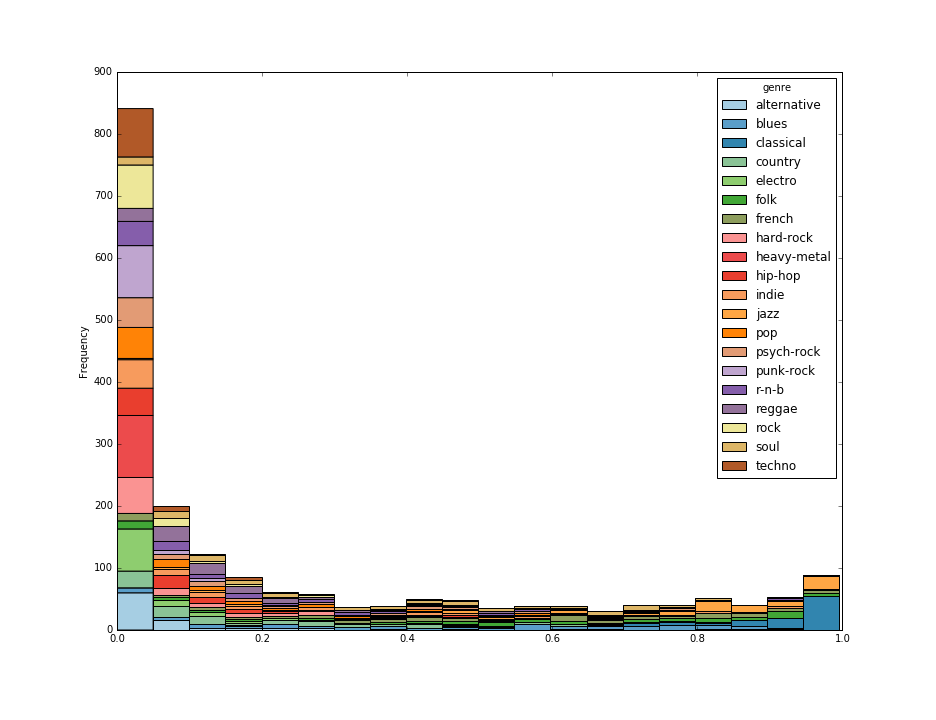

In [253]:
%matplotlib notebook
acousticness = data[['acousticness']]
acousticness_genre = data.loc[:,['acousticness','genre']]

acousticness_by_genre = acousticness_genre.pivot(columns='genre', values='acousticness')
acousticness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [254]:
acousticness.describe()

,acousticness
count,2000.000000
mean,0.257285
std,0.318770
min,0.000001
25%,0.009567
50%,0.090900
75%,0.455250
max,0.996000


In [255]:
tmp_acous_stats = data.groupby('genre')['acousticness'].describe().reset_index()
acous_stats = tmp_acous_stats.pivot(index='genre',columns='level_1',values=None)
acous_stats.columns.name = ''
acous_stats

acousticness                                               \
level_1              25%       50%       75%  count     max      mean   
genre                                                                   
alternative     0.003367  0.025450  0.096650  100.0  0.9240  0.107319   
blues           0.243500  0.524500  0.735500  100.0  0.9270  0.478740   
classical       0.884500  0.964500  0.991250  100.0  0.9960  0.905640   
country         0.034600  0.114500  0.321750  100.0  0.8220  0.204473   
electro         0.006297  0.023350  0.093225  100.0  0.7160  0.080890   
folk            0.208000  0.542000  0.806250  100.0  0.9940  0.513087   
french          0.241750  0.515500  0.781000  100.0  0.9830  0.495967   
hard-rock       0.002927  0.025650  0.145250  100.0  0.6090  0.094690   
heavy-metal     0.000022  0.000136  0.000815  100.0  0.0417  0.002042   
hip-hop         0.019900  0.072500  0.159500  100.0  0.8780  0.138815   
indie           0.010350  0.064650  0.289000  100.0  0.9790  0.205307   
jazz            0.514500  0.820000  0.915750  100.0  0.9950  0.709434   
pop             0.011375  0.049100  0.173000  100.0  0.9320  0.148090   
psych-rock      0.001870  0.058100  0.282250  100.0  0.9560  0.179791   
punk-rock       0.000407  0.002355  0.019650  100.0  0.7410  0.039511   
r-n-b           0.027100  0.081600  0.272000  100.0  0.9450  0.185372   
reggae          0.061900  0.116000  0.204500  100.0  0.8250  0.168275   
rock            0.001650  0.011200  0.062825  100.0  0.6140  0.063496   
soul            0.113750  0.346000  0.632250  100.0  0.9290  0.369574   
techno          0.000721  0.006865  0.043650  100.0  0.5700  0.055187   

                                 
level_1           min       std  
genre                            
alternative  0.000016  0.192433  
blues        0.000998  0.280567  
classical    0.102000  0.149548  
country      0.000600  0.209329  
electro      0.000047  0.141440  
folk         0.000754  0.323466  
french       0.001110  0.306742  
hard-rock    0.000033  0.134875  
heavy-metal  0.000001  0.005871  
hip-hop      0.000662  0.182726  
indie        0.000031  0.279300  
jazz         0.027800  0.274362  
pop          0.000095  0.218823  
psych-rock   0.000003  0.237829  
punk-rock    0.000016  0.111450  
r-n-b        0.000950  0.226194  
reggae       0.000482  0.175242  
rock         0.000021  0.117604  
soul         0.002490  0.280327  
techno       0.000005  0.115075

# Danceability attribute

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

<IPython.core.display.Javascript object>


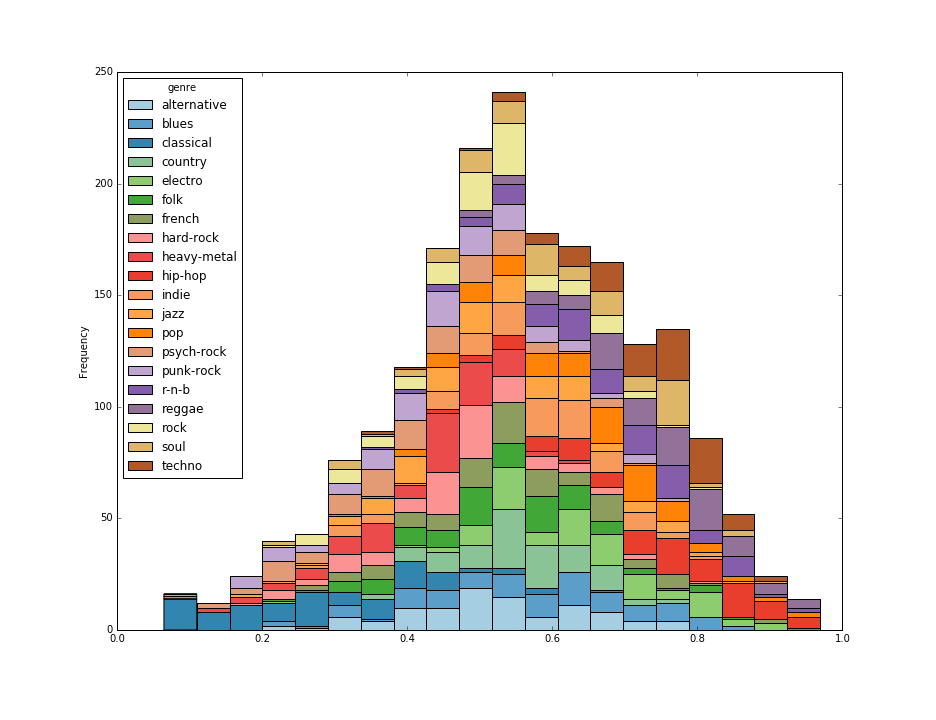

In [256]:
danceability = data[['danceability']]
danceability_genre = data.loc[:,['danceability','genre']]

danceability_by_genre = danceability_genre.pivot(columns='genre', values='danceability')
danceability_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [257]:
danceability.describe()

,danceability
count,2000.000000
mean,0.556582
std,0.171023
min,0.064700
25%,0.450000
50%,0.553000
75%,0.680250
max,0.969000


In [258]:
tmp_dance_stats = data.groupby('genre')['danceability'].describe().reset_index()
dance_stats = tmp_dance_stats.pivot(index='genre',columns='level_1',values=None)
dance_stats.columns.name = ''
dance_stats

danceability                                                   \
level_1              25%     50%      75%  count    max      mean     min   
genre                                                                       
alternative      0.44350  0.5120  0.61025  100.0  0.770  0.518630  0.2230   
blues            0.46875  0.5915  0.68850  100.0  0.858  0.576660  0.2030   
classical        0.16700  0.2750  0.38925  100.0  0.692  0.285773  0.0647   
country          0.50975  0.5600  0.61425  100.0  0.768  0.561970  0.3580   
electro          0.54425  0.6365  0.71675  100.0  0.912  0.643540  0.2400   
folk             0.44325  0.5380  0.61175  100.0  0.961  0.534540  0.2350   
french           0.46350  0.5455  0.65250  100.0  0.912  0.549500  0.2580   
hard-rock        0.39575  0.4770  0.53375  100.0  0.806  0.463220  0.1050   
heavy-metal      0.35275  0.4415  0.50175  100.0  0.649  0.417410  0.1430   
hip-hop          0.64800  0.7605  0.84150  100.0  0.969  0.739260  0.4290   
indie            0.48950  0.5695  0.64425  100.0  0.803  0.559460  0.2350   
jazz             0.43425  0.5165  0.62050  100.0  0.878  0.527260  0.1620   
pop              0.54400  0.6600  0.72850  100.0  0.937  0.642030  0.3020   
psych-rock       0.32775  0.4090  0.49800  100.0  0.699  0.407042  0.0832   
punk-rock        0.35575  0.4580  0.54550  100.0  0.774  0.449510  0.1680   
r-n-b            0.59375  0.6805  0.76325  100.0  0.937  0.677280  0.3530   
reggae           0.66975  0.7500  0.80575  100.0  0.953  0.737030  0.4950   
rock             0.43600  0.5175  0.57950  100.0  0.806  0.506190  0.2170   
soul             0.51425  0.6085  0.74450  100.0  0.896  0.610730  0.2120   
techno           0.67375  0.7475  0.79825  100.0  0.906  0.724610  0.3580   

                       
level_1           std  
genre                  
alternative  0.123105  
blues        0.151946  
classical    0.143686  
country      0.087739  
electro      0.122341  
folk         0.133660  
french       0.133899  
hard-rock    0.121761  
heavy-metal  0.105789  
hip-hop      0.129627  
indie        0.119427  
jazz         0.136499  
pop          0.129960  
psych-rock   0.132405  
punk-rock    0.138880  
r-n-b        0.123536  
reggae       0.106356  
rock         0.121752  
soul         0.148954  
techno       0.099678

# Duration attribute

The duration of the track in milliseconds.

<IPython.core.display.Javascript object>


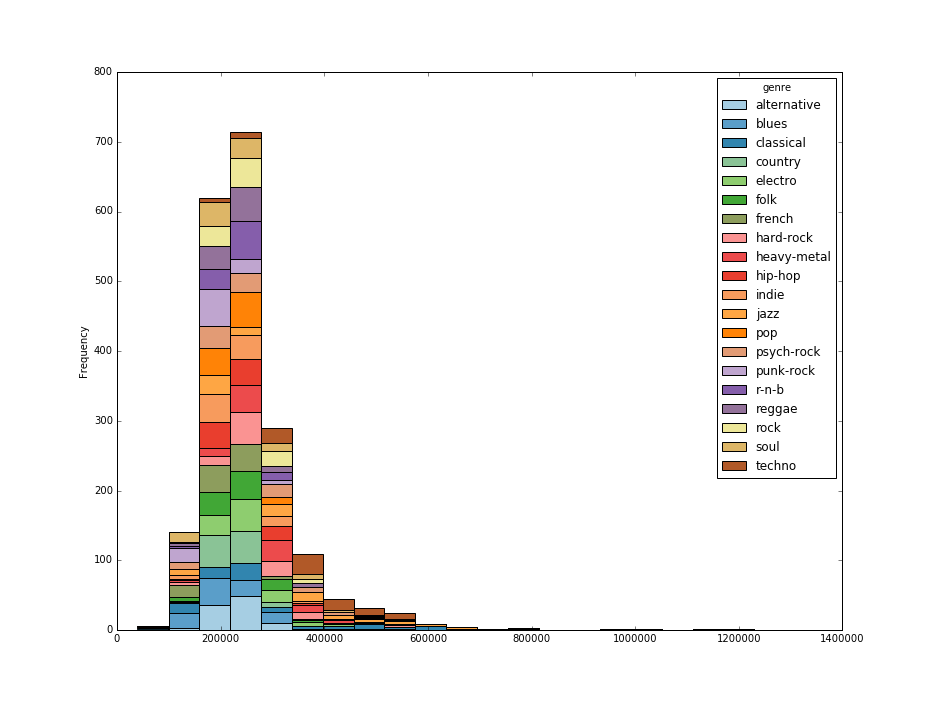

In [259]:
duration_ms = data[['duration_ms']]
duration_ms_genre = data.loc[:,['duration_ms','genre']]

duration_ms_by_genre = duration_ms_genre.pivot(columns='genre', values='duration_ms')
duration_ms_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [260]:
duration_ms.describe()

,duration_ms
count,2.000000e+03
mean,2.529622e+05
std,9.500328e+04
min,4.013300e+04
25%,1.994682e+05
50%,2.333025e+05
75%,2.808198e+05
max,1.229933e+06


In [261]:
tmp_dura_stats = data.groupby('genre')['duration_ms'].describe().reset_index()
dura_stats = tmp_dura_stats.pivot(index='genre',columns='level_1',values=None)
dura_stats.columns.name = ''
dura_stats

duration_ms                                                    \
level_1             25%       50%        75%  count        max       mean   
genre                                                                       
alternative   199736.50  231840.0  258520.00  100.0   493400.0  233615.82   
blues         163033.00  193860.0  254743.25  100.0   535333.0  214956.05   
classical     184836.50  260926.5  450766.50  100.0  1160000.0  337540.47   
country       199463.25  220380.0  235177.00  100.0   323467.0  221435.78   
electro       213906.50  237146.0  271589.75  100.0   410097.0  249060.47   
folk          203570.00  235060.0  267617.00  100.0   402267.0  236999.53   
french        167003.25  209360.0  249043.00  100.0   363346.0  207324.31   
hard-rock     228857.00  264526.5  298469.75  100.0   536960.0  270685.78   
heavy-metal   236730.25  271979.5  319580.25  100.0   536133.0  283794.63   
hip-hop       211665.50  230293.5  271687.00  100.0   461840.0  244845.09   
indie         201403.00  222240.0  256270.25  100.0   467587.0  233687.80   
jazz          192933.50  283473.5  361650.00  100.0  1229933.0  317271.92   
pop           204253.75  227500.0  256805.00  100.0   484147.0  233693.05   
psych-rock    189155.25  236460.0  300171.50  100.0   478973.0  250782.08   
punk-rock     171466.75  196738.5  218949.75  100.0   548253.0  199587.98   
r-n-b         212489.75  239026.5  260483.25  100.0   484147.0  235536.20   
reggae        209483.50  230420.0  250351.75  100.0   382867.0  235484.52   
rock          210070.00  237287.0  286716.50  100.0   536960.0  250122.88   
soul          175019.75  220433.5  260046.50  100.0   535333.0  232994.81   
techno        295629.75  365353.5  431501.75  100.0   590333.0  369824.92   

                                      
level_1           min            std  
genre                                 
alternative  110093.0   52866.612827  
blues        119133.0   70161.161186  
classical     75849.0  213081.819248  
country      148107.0   33576.004544  
electro      148387.0   50978.610896  
folk         124627.0   54252.040265  
french        73160.0   52864.117633  
hard-rock     40133.0   74468.150925  
heavy-metal  147827.0   71005.471418  
hip-hop      126960.0   55105.267099  
indie        110093.0   56141.530203  
jazz          77533.0  177449.899423  
pop          155337.0   42243.213246  
psych-rock   119133.0   79152.043135  
punk-rock    100600.0   56715.513604  
r-n-b        119133.0   47132.781523  
reggae       108315.0   49618.421717  
rock         121880.0   59680.427521  
soul         108507.0   79730.141311  
techno       146533.0   95435.887577

# Energy attribute

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

<IPython.core.display.Javascript object>


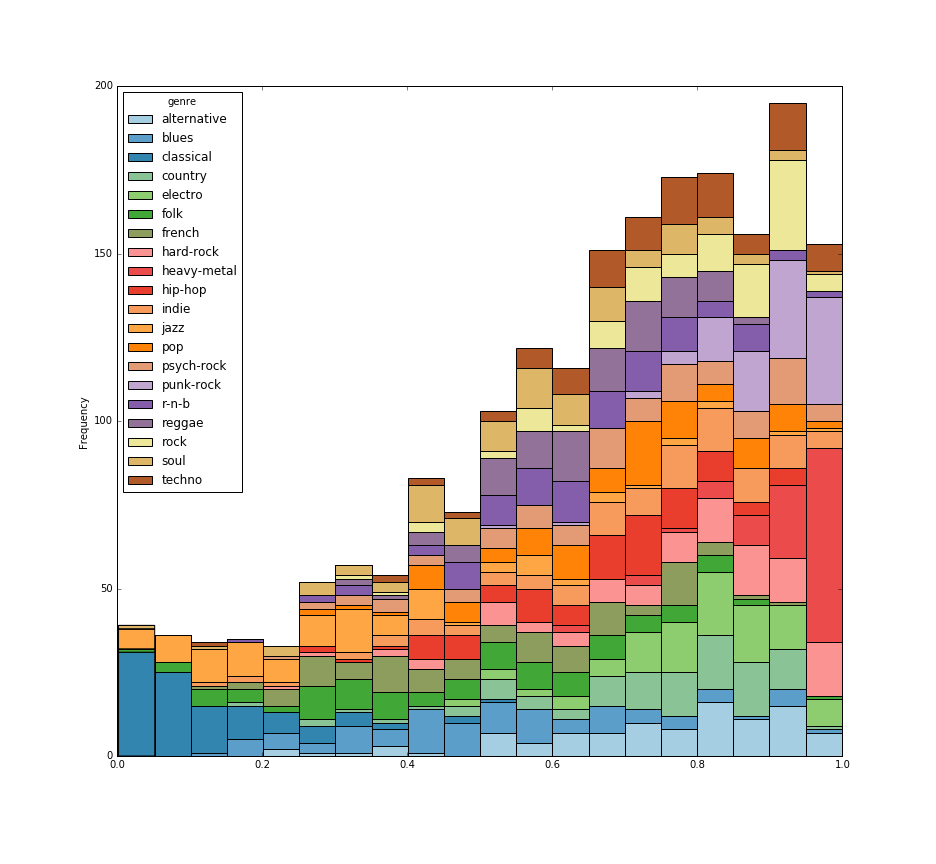

In [262]:
energy = data[['energy']]
energy_genre = data.loc[:,['energy','genre']]

energy_by_genre = energy_genre.pivot(columns='genre', values='energy')
energy_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,12],bins=20)

In [263]:
energy.describe()

,energy
count,2000.000000
mean,0.651865
std,0.249179
min,0.002110
25%,0.504000
50%,0.702000
75%,0.852250
max,0.999000


In [264]:
tmp_ener_stats = data.groupby('genre')['energy'].describe().reset_index()
ener_stats = tmp_ener_stats.pivot(index='genre',columns='level_1',values=None)
ener_stats.columns.name = ''
ener_stats

energy                                                    \
level_1           25%     50%      75%  count    max      mean      min   
genre                                                                     
alternative  0.644500  0.7920  0.88325  100.0  0.983  0.747390  0.20600   
blues        0.378250  0.5020  0.66525  100.0  0.975  0.519220  0.13800   
classical    0.036125  0.0858  0.17950  100.0  0.526  0.122932  0.00258   
country      0.666000  0.7825  0.86100  100.0  0.956  0.740840  0.16300   
electro      0.738250  0.8195  0.88175  100.0  0.993  0.801330  0.46100   
folk         0.307750  0.4910  0.65150  100.0  0.969  0.477138  0.03050   
french       0.366000  0.5365  0.67725  100.0  0.931  0.526450  0.13700   
hard-rock    0.681250  0.8235  0.91225  100.0  0.992  0.781890  0.25100   
heavy-metal  0.924500  0.9595  0.97900  100.0  0.999  0.933360  0.62000   
hip-hop      0.561500  0.6925  0.76075  100.0  0.945  0.662800  0.26700   
indie        0.599250  0.7535  0.84800  100.0  0.977  0.702880  0.14300   
jazz         0.158750  0.3030  0.44300  100.0  0.951  0.326781  0.00211   
pop          0.589500  0.7110  0.79350  100.0  0.963  0.684180  0.26400   
psych-rock   0.572250  0.7040  0.85950  100.0  0.995  0.698160  0.21600   
punk-rock    0.873250  0.9215  0.96200  100.0  0.996  0.901870  0.51500   
r-n-b        0.547750  0.6525  0.77575  100.0  0.977  0.649990  0.18300   
reggae       0.557000  0.6525  0.73475  100.0  0.868  0.645800  0.30900   
rock         0.706500  0.8425  0.90700  100.0  0.979  0.794330  0.34500   
soul         0.447750  0.5695  0.70125  100.0  0.975  0.572214  0.02640   
techno       0.657250  0.7675  0.87175  100.0  0.987  0.747750  0.13800   

                       
level_1           std  
genre                  
alternative  0.179010  
blues        0.201854  
classical    0.115630  
country      0.165528  
electro      0.121059  
folk         0.222278  
french       0.197413  
hard-rock    0.174267  
heavy-metal  0.073610  
hip-hop      0.150930  
indie        0.196250  
jazz         0.215435  
pop          0.164102  
psych-rock   0.194239  
punk-rock    0.082247  
r-n-b        0.164448  
reggae       0.123766  
rock         0.150230  
soul         0.188644  
techno       0.160032

# Instrumentalness attribute

Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

<IPython.core.display.Javascript object>


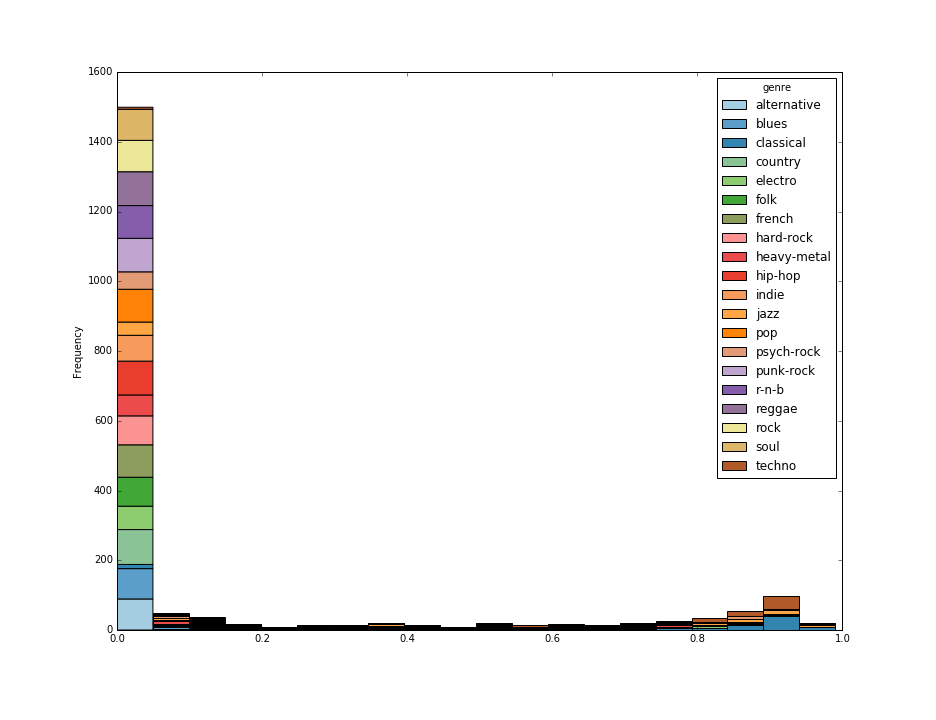

In [265]:
instrumentalness = data[['instrumentalness']]
instrumentalness_genre = data.loc[:,['instrumentalness','genre']]

instrumentalness_by_genre = instrumentalness_genre.pivot(columns='genre', values='instrumentalness')
instrumentalness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [266]:
instrumentalness.describe()

,instrumentalness
count,2000.000000
mean,0.149537
std,0.299599
min,0.000000
25%,0.000000
50%,0.000135
75%,0.051000
max,0.990000


In [267]:
tmp_inst_stats = data.groupby('genre')['instrumentalness'].describe().reset_index()
inst_stats = tmp_inst_stats.pivot(index='genre',columns='level_1',values=None)
inst_stats.columns.name = ''
inst_stats

instrumentalness                                               \
level_1                  25%       50%       75%  count     max      mean   
genre                                                                       
alternative         0.000000  0.000018  0.001478  100.0  0.8760  0.033739   
blues               0.000000  0.000087  0.006077  100.0  0.9430  0.040115   
classical           0.697500  0.884500  0.920500  100.0  0.9900  0.738840   
country             0.000000  0.000000  0.000019  100.0  0.0481  0.000764   
electro             0.000002  0.001900  0.235250  100.0  0.9260  0.186537   
folk                0.000006  0.000354  0.011000  100.0  0.8820  0.081739   
french              0.000000  0.000005  0.000789  100.0  0.8730  0.034405   
hard-rock           0.000005  0.000424  0.012925  100.0  0.9020  0.051266   
heavy-metal         0.000320  0.006550  0.298750  100.0  0.9040  0.188481   
hip-hop             0.000000  0.000000  0.000010  100.0  0.3880  0.008693   
indie               0.000050  0.003795  0.051825  100.0  0.9250  0.095095   
jazz                0.000865  0.262500  0.846000  100.0  0.9820  0.395765   
pop                 0.000000  0.000001  0.000062  100.0  0.6160  0.017698   
psych-rock          0.001185  0.048750  0.627250  100.0  0.9540  0.286865   
punk-rock           0.000000  0.000002  0.000136  100.0  0.7740  0.016060   
r-n-b               0.000000  0.000003  0.000208  100.0  0.2260  0.008265   
reggae              0.000000  0.000000  0.000019  100.0  0.1840  0.006049   
rock                0.000000  0.000108  0.001863  100.0  0.7890  0.037841   
soul                0.000000  0.000004  0.000663  100.0  0.7220  0.031544   
techno              0.648000  0.873500  0.912000  100.0  0.9580  0.730973   

                            
level_1      min       std  
genre                       
alternative  0.0  0.135483  
blues        0.0  0.133370  
classical    0.0  0.298502  
country      0.0  0.004882  
electro      0.0  0.310374  
folk         0.0  0.207741  
french       0.0  0.135817  
hard-rock    0.0  0.142450  
heavy-metal  0.0  0.300978  
hip-hop      0.0  0.048501  
indie        0.0  0.199290  
jazz         0.0  0.392437  
pop          0.0  0.079914  
psych-rock   0.0  0.345008  
punk-rock    0.0  0.089981  
r-n-b        0.0  0.032986  
reggae       0.0  0.028855  
rock         0.0  0.137430  
soul         0.0  0.111837  
techno       0.0  0.279226

# Key attribute

The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [268]:
key = data[['key']]
key.describe()

,key
count,2000.00000
mean,5.20150
std,3.52365
min,0.00000
25%,2.00000
50%,5.00000
75%,8.00000
max,11.00000


In [269]:
tmp_key_stats = data.groupby('genre')['key'].describe().reset_index()
key_stats = tmp_key_stats.pivot(index='genre',columns='level_1',values=None)
key_stats.columns.name = ''
key_stats

key                                             
level_1      25%  50%   75%  count   max  mean  min       std
genre                                                        
alternative  2.0  5.0  8.25  100.0  11.0  5.32  0.0  3.601010
blues        3.0  5.5  9.00  100.0  11.0  5.94  0.0  3.530016
classical    2.0  4.5  7.00  100.0  11.0  4.63  0.0  3.392371
country      2.0  5.0  8.00  100.0  11.0  5.16  0.0  3.445741
electro      1.0  5.0  8.00  100.0  11.0  5.10  0.0  3.563281
folk         2.0  5.0  7.00  100.0  11.0  4.67  0.0  3.018646
french       2.0  5.5  8.00  100.0  11.0  5.26  0.0  3.497820
hard-rock    2.0  5.5  9.00  100.0  11.0  5.24  0.0  3.643508
heavy-metal  2.0  6.0  8.25  100.0  11.0  5.50  0.0  3.459725
hip-hop      1.0  4.0  7.25  100.0  11.0  4.49  0.0  3.397845
indie        2.0  5.0  7.25  100.0  11.0  4.73  0.0  3.492720
jazz         2.0  5.0  8.00  100.0  11.0  5.18  0.0  3.322346
pop          2.0  6.0  8.00  100.0  11.0  5.16  0.0  3.395541
psych-rock   2.0  6.0  9.00  100.0  11.0  5.64  0.0  3.374054
punk-rock    2.0  4.0  7.00  100.0  11.0  4.79  0.0  3.596561
r-n-b        1.0  6.0  9.00  100.0  11.0  5.57  0.0  3.903521
reggae       1.0  6.0  8.00  100.0  11.0  5.38  0.0  3.645337
rock         2.0  5.0  9.00  100.0  11.0  5.15  0.0  3.500000
soul         2.0  6.0  9.00  100.0  11.0  5.56  0.0  3.764051
techno       2.0  6.0  9.00  100.0  11.0  5.56  0.0  3.769414

# Liveness attribute

Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

<IPython.core.display.Javascript object>


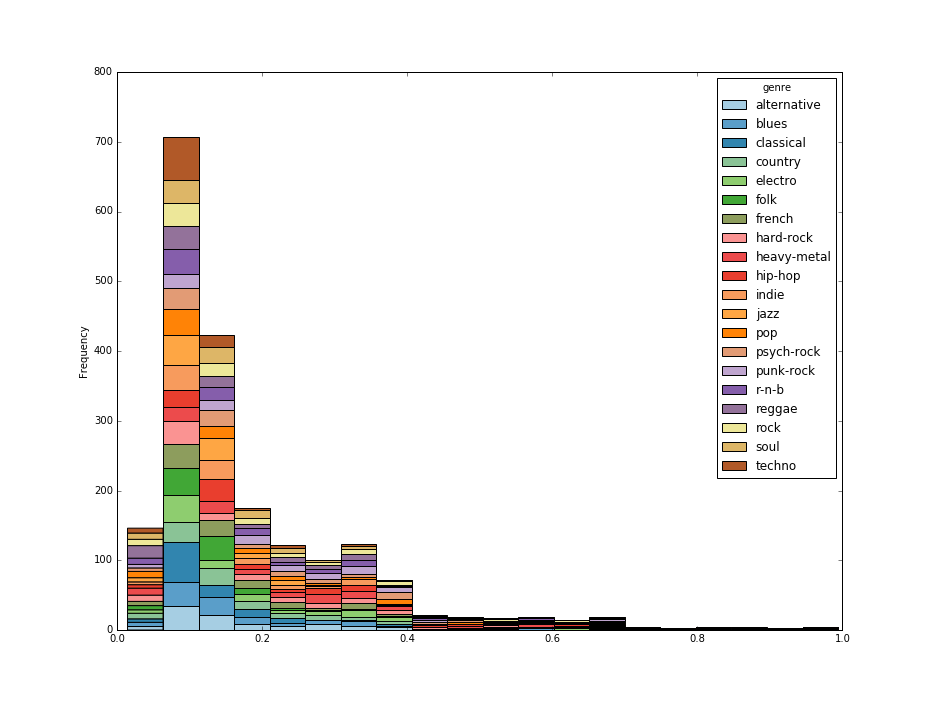

In [270]:
liveness = data[['liveness']]
liveness_genre = data.loc[:,['liveness','genre']]

liveness_by_genre = liveness_genre.pivot(columns='genre', values='liveness')
liveness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [271]:
liveness.describe()

,liveness
count,2000.000000
mean,0.181645
std,0.145880
min,0.014500
25%,0.091525
50%,0.122000
75%,0.229000
max,0.994000


In [272]:
tmp_live_stats = data.groupby('genre')['liveness'].describe().reset_index()
live_stats = tmp_live_stats.pivot(index='genre',columns='level_1',values=None)
live_stats.columns.name = ''
live_stats

liveness                                                   \
level_1           25%     50%      75%  count    max      mean     min   
genre                                                                    
alternative  0.101000  0.1235  0.24250  100.0  0.800  0.181880  0.0433   
blues        0.094750  0.1295  0.19575  100.0  0.800  0.177746  0.0388   
classical    0.087350  0.1045  0.13975  100.0  0.784  0.129781  0.0443   
country      0.095125  0.1235  0.24225  100.0  0.668  0.172111  0.0262   
electro      0.084775  0.1310  0.27925  100.0  0.640  0.197052  0.0255   
folk         0.098900  0.1175  0.14625  100.0  0.932  0.158858  0.0435   
french       0.096175  0.1350  0.21550  100.0  0.960  0.176019  0.0283   
hard-rock    0.092275  0.1365  0.28025  100.0  0.964  0.209505  0.0283   
heavy-metal  0.100075  0.1840  0.32150  100.0  0.926  0.235139  0.0280   
hip-hop      0.107750  0.1330  0.27500  100.0  0.719  0.201867  0.0546   
indie        0.092875  0.1245  0.20550  100.0  0.800  0.174028  0.0433   
jazz         0.091125  0.1135  0.15150  100.0  0.961  0.156543  0.0388   
pop          0.089200  0.1190  0.21650  100.0  0.673  0.178835  0.0210   
psych-rock   0.093475  0.1270  0.31975  100.0  0.690  0.208301  0.0521   
punk-rock    0.110500  0.1995  0.32750  100.0  0.870  0.233665  0.0164   
r-n-b        0.094150  0.1235  0.22700  100.0  0.994  0.187715  0.0263   
reggae       0.072125  0.1105  0.23175  100.0  0.852  0.162217  0.0145   
rock         0.092200  0.1285  0.25500  100.0  0.698  0.189707  0.0210   
soul         0.090425  0.1250  0.20100  100.0  0.691  0.170938  0.0366   
techno       0.084175  0.1030  0.11825  100.0  0.883  0.131001  0.0327   

                       
level_1           std  
genre                  
alternative  0.128970  
blues        0.144802  
classical    0.090890  
country      0.119049  
electro      0.147090  
folk         0.147969  
french       0.132470  
hard-rock    0.175968  
heavy-metal  0.171789  
hip-hop      0.153383  
indie        0.130553  
jazz         0.161156  
pop          0.137502  
psych-rock   0.151902  
punk-rock    0.160419  
r-n-b        0.162912  
reggae       0.143683  
rock         0.147274  
soul         0.130232  
techno       0.113877

# Loudness attribute

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

<IPython.core.display.Javascript object>


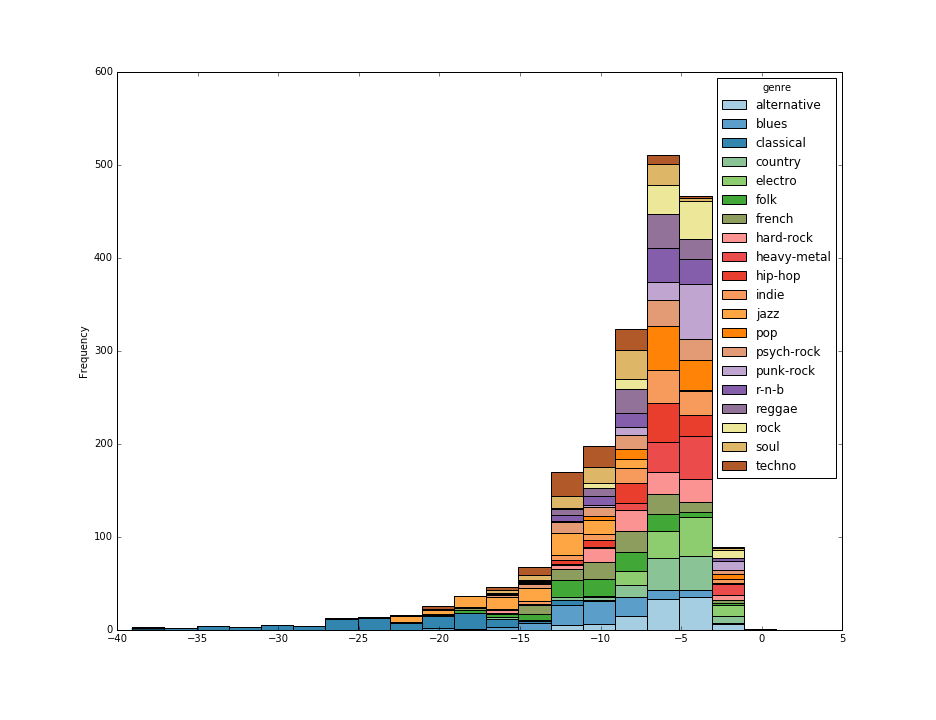

In [273]:
loudness = data[['loudness']]
loudness_genre = data.loc[:,['loudness','genre']]

loudness_by_genre = loudness_genre.pivot(columns='genre', values='loudness')
loudness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [274]:
loudness.describe()

,loudness
count,2000.000000
mean,-8.258654
std,5.080041
min,-39.053000
25%,-10.041500
50%,-6.817500
75%,-4.899500
max,0.878000


In [275]:
tmp_loud_stats = data.groupby('genre')['loudness'].describe().reset_index()
loud_stats = tmp_loud_stats.pivot(index='genre',columns='level_1',values=None)
loud_stats.columns.name = ''
loud_stats

loudness                                                      \
level_1           25%      50%       75%  count     max      mean     min   
genre                                                                       
alternative  -7.11350  -5.5590  -4.24525  100.0  -1.606  -6.00097 -13.057   
blues       -11.88800 -10.0570  -8.18325  100.0  -1.853  -9.95801 -20.072   
classical   -26.29800 -21.3025 -18.36775  100.0 -10.007 -22.58355 -39.053   
country      -6.58500  -5.3035  -4.29450  100.0  -2.569  -5.83379 -16.942   
electro      -6.58425  -4.9825  -3.99150  100.0  -1.145  -5.30612 -13.399   
folk        -12.01200  -9.1420  -7.06600  100.0  -2.742  -9.93618 -22.859   
french      -11.02350  -8.2795  -6.55275  100.0  -2.114  -8.84690 -18.665   
hard-rock    -8.88450  -6.7565  -4.66375  100.0  -2.528  -7.12374 -15.978   
heavy-metal  -5.88425  -4.8635  -3.76850  100.0  -1.711  -5.04057 -12.120   
hip-hop      -7.61250  -6.2400  -5.13500  100.0  -1.847  -6.58270 -17.091   
indie        -7.68900  -5.9920  -4.81975  100.0  -1.606  -6.89709 -20.700   
jazz        -17.14200 -13.3100 -11.07025  100.0  -5.077 -14.11572 -25.358   
pop          -6.66325  -5.5060  -4.45550  100.0  -2.244  -5.71666 -10.058   
psych-rock   -9.82875  -6.6675  -5.00425  100.0  -1.939  -7.53709 -16.167   
punk-rock    -5.50100  -4.3615  -3.67025  100.0   0.878  -4.83469 -13.880   
r-n-b        -8.03175  -6.1360  -4.78700  100.0  -1.866  -6.63894 -14.376   
reggae       -8.32925  -6.7950  -5.37150  100.0  -3.260  -7.15653 -16.065   
rock         -6.65050  -5.1105  -4.01800  100.0  -1.665  -5.62137 -15.128   
soul        -10.32675  -8.5060  -6.82300  100.0  -2.540  -8.98611 -21.644   
techno      -12.11450 -10.4355  -8.17800  100.0  -2.342 -10.45635 -20.594   

                       
level_1           std  
genre                  
alternative  2.396582  
blues        3.343857  
classical    6.302587  
country      2.515867  
electro      2.054979  
folk         4.039044  
french       3.497789  
hard-rock    3.010171  
heavy-metal  1.753847  
hip-hop      2.326977  
indie        3.376222  
jazz         4.299092  
pop          1.697889  
psych-rock   3.424060  
punk-rock    2.065428  
r-n-b        2.511443  
reggae       2.451777  
rock         2.359776  
soul         3.385237  
techno       3.174276

# Mode attribute

Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

In [276]:
mode = data[['mode']]
mode.describe()

,mode
count,2000.000000
mean,0.628000
std,0.483459
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [277]:
tmp_mode_stats = data.groupby('genre')['mode'].describe().reset_index()
mode_stats = tmp_mode_stats.pivot(index='genre',columns='level_1',values=None)
mode_stats.columns.name = ''
mode_stats

mode                                           
level_1      25%  50%  75%  count  max  mean  min       std
genre                                                      
alternative  0.0  1.0  1.0  100.0  1.0  0.74  0.0  0.440844
blues        1.0  1.0  1.0  100.0  1.0  0.77  0.0  0.422953
classical    0.0  1.0  1.0  100.0  1.0  0.54  0.0  0.500908
country      1.0  1.0  1.0  100.0  1.0  0.90  0.0  0.301511
electro      0.0  1.0  1.0  100.0  1.0  0.51  0.0  0.502418
folk         1.0  1.0  1.0  100.0  1.0  0.79  0.0  0.409360
french       0.0  1.0  1.0  100.0  1.0  0.52  0.0  0.502117
hard-rock    0.0  1.0  1.0  100.0  1.0  0.64  0.0  0.482418
heavy-metal  0.0  0.0  1.0  100.0  1.0  0.45  0.0  0.500000
hip-hop      0.0  1.0  1.0  100.0  1.0  0.66  0.0  0.476095
indie        0.0  1.0  1.0  100.0  1.0  0.68  0.0  0.468826
jazz         0.0  1.0  1.0  100.0  1.0  0.55  0.0  0.500000
pop          0.0  1.0  1.0  100.0  1.0  0.56  0.0  0.498888
psych-rock   0.0  1.0  1.0  100.0  1.0  0.69  0.0  0.464823
punk-rock    0.0  1.0  1.0  100.0  1.0  0.73  0.0  0.446196
r-n-b        0.0  1.0  1.0  100.0  1.0  0.59  0.0  0.494311
reggae       0.0  1.0  1.0  100.0  1.0  0.59  0.0  0.494311
rock         0.0  1.0  1.0  100.0  1.0  0.56  0.0  0.498888
soul         0.0  1.0  1.0  100.0  1.0  0.60  0.0  0.492366
techno       0.0  0.0  1.0  100.0  1.0  0.49  0.0  0.502418

# Speechiness attribute

Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

<IPython.core.display.Javascript object>


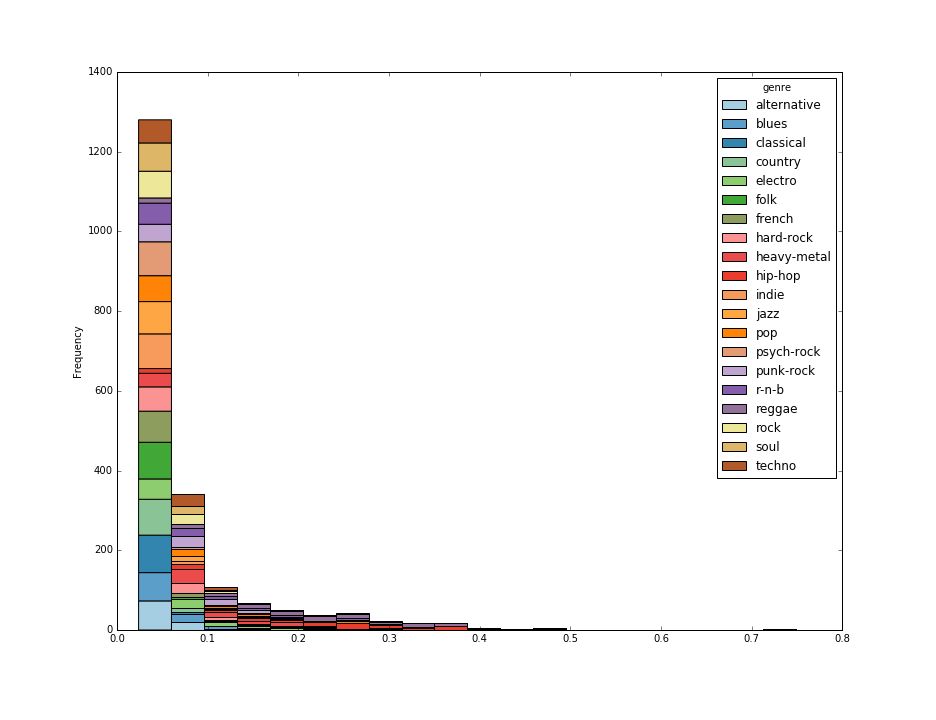

In [278]:
speechiness = data[['speechiness']]
speechiness_genre = data.loc[:,['speechiness','genre']]

speechiness_by_genre = speechiness_genre.pivot(columns='genre', values='speechiness')
speechiness_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [279]:
speechiness.describe()

,speechiness
count,2000.000000
mean,0.076753
std,0.075770
min,0.023800
25%,0.036200
50%,0.047600
75%,0.078700
max,0.749000


In [280]:
tmp_speech_stats = data.groupby('genre')['speechiness'].describe().reset_index()
speech_stats = tmp_speech_stats.pivot(index='genre',columns='level_1',values=None)
speech_stats.columns.name = ''
speech_stats

speechiness                                                      \
level_1             25%      50%       75%  count     max      mean     min   
genre                                                                         
alternative    0.033825  0.04130  0.060475  100.0  0.1860  0.051584  0.0238   
blues          0.033100  0.04235  0.064350  100.0  0.2760  0.054500  0.0245   
classical      0.038075  0.04250  0.047525  100.0  0.0827  0.044294  0.0319   
country        0.031575  0.03885  0.048550  100.0  0.1440  0.042542  0.0239   
electro        0.040700  0.05830  0.088375  100.0  0.3620  0.082326  0.0274   
folk           0.029375  0.03315  0.040700  100.0  0.1960  0.039992  0.0255   
french         0.033425  0.03920  0.058825  100.0  0.2810  0.060167  0.0241   
hard-rock      0.033250  0.05310  0.071450  100.0  0.2270  0.061440  0.0257   
heavy-metal    0.053450  0.08000  0.111750  100.0  0.2270  0.091322  0.0265   
hip-hop        0.105700  0.23000  0.296500  100.0  0.7490  0.223180  0.0323   
indie          0.031000  0.03675  0.044875  100.0  0.1920  0.044778  0.0258   
jazz           0.035175  0.04080  0.055800  100.0  0.1950  0.050912  0.0252   
pop            0.038375  0.04755  0.080325  100.0  0.3850  0.074477  0.0243   
psych-rock     0.033375  0.03940  0.050925  100.0  0.3340  0.055059  0.0265   
punk-rock      0.044925  0.06375  0.103750  100.0  0.2460  0.078278  0.0261   
r-n-b          0.042975  0.05680  0.104500  100.0  0.3200  0.087182  0.0272   
reggae         0.107750  0.20850  0.295000  100.0  0.5650  0.208852  0.0298   
rock           0.034025  0.04315  0.065350  100.0  0.3040  0.057232  0.0248   
soul           0.035425  0.04370  0.065550  100.0  0.2850  0.059793  0.0250   
techno         0.045900  0.05760  0.072100  100.0  0.2620  0.067158  0.0319   

                       
level_1           std  
genre                  
alternative  0.028029  
blues        0.036741  
classical    0.008874  
country      0.016080  
electro      0.064831  
folk         0.022625  
french       0.053926  
hard-rock    0.038333  
heavy-metal  0.048990  
hip-hop      0.138273  
indie        0.026070  
jazz         0.028925  
pop          0.066256  
psych-rock   0.050666  
punk-rock    0.044450  
r-n-b        0.067977  
reggae       0.120101  
rock         0.042700  
soul         0.047268  
techno       0.037725

# Tempo attribute

The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

<IPython.core.display.Javascript object>


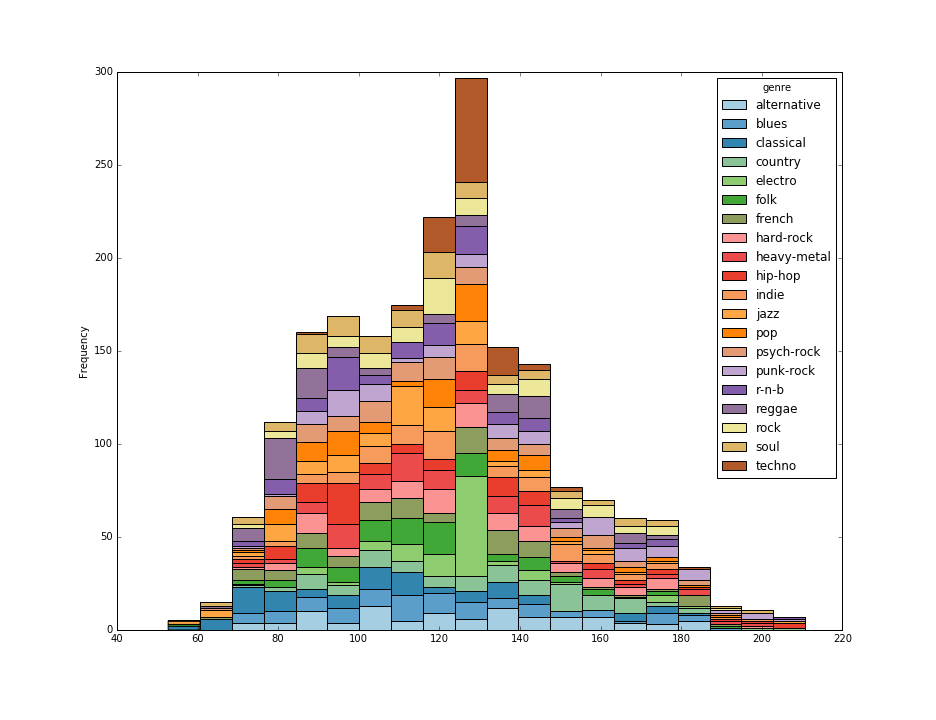

In [281]:
tempo = data[['tempo']]
tempo_genre = data.loc[:,['tempo','genre']]

tempo_by_genre = tempo_genre.pivot(columns='genre', values='tempo')
tempo_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [282]:
tempo.describe()

,tempo
count,2000.000000
mean,121.069932
std,28.407550
min,52.700000
25%,99.888000
50%,120.913500
75%,138.039750
max,210.750000


In [283]:
tmp_tempo_stats = data.groupby('genre')['tempo'].describe().reset_index()
tempo_stats = tmp_tempo_stats.pivot(index='genre',columns='level_1',values=None)
tempo_stats.columns.name = ''
tempo_stats

tempo                                                  \
level_1            25%       50%        75%  count      max       mean   
genre                                                                    
alternative  102.52175  125.5745  148.01950  100.0  184.086  125.70670   
blues         98.37675  116.5935  139.01700  100.0  189.346  120.04732   
classical     78.10500  103.2880  129.71050  100.0  182.121  106.30665   
country      108.75400  135.9515  153.95225  100.0  205.958  132.68920   
electro      119.50300  126.0545  128.05675  100.0  179.856  124.68681   
folk         101.54350  115.0765  128.90225  100.0  192.323  116.85962   
french        99.78475  121.5260  137.96775  100.0  192.073  120.29092   
hard-rock    105.95850  124.7880  141.14100  100.0  201.780  125.33860   
heavy-metal  103.57600  118.8910  140.05925  100.0  202.777  124.38122   
hip-hop       94.25700  109.9190  135.36325  100.0  209.588  118.56688   
indie        108.08550  123.7345  144.06850  100.0  201.001  125.55721   
jazz          94.08600  111.3190  124.69800  100.0  203.050  110.46496   
pop           95.86825  120.5785  130.02250  100.0  189.879  118.06210   
psych-rock    99.00825  116.8795  139.52950  100.0  189.635  119.99081   
punk-rock    103.00850  133.8700  162.54400  100.0  205.278  135.47706   
r-n-b         96.83950  116.1680  129.99800  100.0  210.750  116.38601   
reggae        82.45025   99.0375  138.26225  100.0  172.547  110.34188   
rock         104.87125  122.5175  143.94075  100.0  189.931  124.70253   
soul          95.20300  114.6365  134.08475  100.0  199.373  117.93379   
techno       123.98250  126.2410  130.41275  100.0  180.013  127.60838   

                                
level_1         min        std  
genre                           
alternative  73.552  29.727052  
blues        68.671  29.811081  
classical    52.700  31.689432  
country      72.188  29.148711  
electro      72.426  17.171654  
folk         60.527  24.064089  
french       66.698  29.187535  
hard-rock    75.766  27.200436  
heavy-metal  75.018  28.832184  
hip-hop      74.990  32.462636  
indie        73.552  25.878444  
jazz         59.385  25.578553  
pop          72.795  25.483013  
psych-rock   67.730  28.393964  
punk-rock    74.984  33.856201  
r-n-b        68.880  26.901033  
reggae       66.858  30.921599  
rock         75.766  26.986517  
soul         62.092  29.875046  
techno       90.035   9.248091

# Time Signature attribute

An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [284]:
time_signature = data[['time_signature']]
time_signature.describe(percentiles=[])

,time_signature
count,2000.000000
mean,3.924500
std,0.361753
min,1.000000
50%,4.000000
max,5.000000


In [285]:
tmp_ts_stats = data.groupby('genre')['time_signature'].describe(percentiles=[]).reset_index()
ts_stats = tmp_ts_stats.pivot(index='genre',columns='level_1',values=None)
ts_stats.columns.name = ''
ts_stats

time_signature                                 
level_1                50%  count  max  mean  min       std
genre                                                      
alternative            4.0  100.0  4.0  3.97  3.0  0.171447
blues                  4.0  100.0  5.0  3.83  3.0  0.403395
classical              4.0  100.0  5.0  3.63  1.0  0.939106
country                4.0  100.0  4.0  3.99  3.0  0.100000
electro                4.0  100.0  5.0  3.99  3.0  0.173787
folk                   4.0  100.0  4.0  3.90  3.0  0.301511
french                 4.0  100.0  5.0  3.82  1.0  0.519907
hard-rock              4.0  100.0  5.0  3.98  3.0  0.200000
heavy-metal            4.0  100.0  4.0  3.91  1.0  0.378594
hip-hop                4.0  100.0  5.0  3.98  3.0  0.200000
indie                  4.0  100.0  4.0  3.95  1.0  0.329524
jazz                   4.0  100.0  5.0  3.90  3.0  0.389249
pop                    4.0  100.0  4.0  3.93  1.0  0.355477
psych-rock             4.0  100.0  4.0  3.92  3.0  0.272660
punk-rock              4.0  100.0  4.0  3.97  3.0  0.171447
r-n-b                  4.0  100.0  4.0  3.96  3.0  0.196946
reggae                 4.0  100.0  5.0  4.02  3.0  0.200000
rock                   4.0  100.0  4.0  3.97  3.0  0.171447
soul                   4.0  100.0  4.0  3.87  1.0  0.418149
techno                 4.0  100.0  5.0  4.00  3.0  0.142134

# Valence attribute

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

<IPython.core.display.Javascript object>


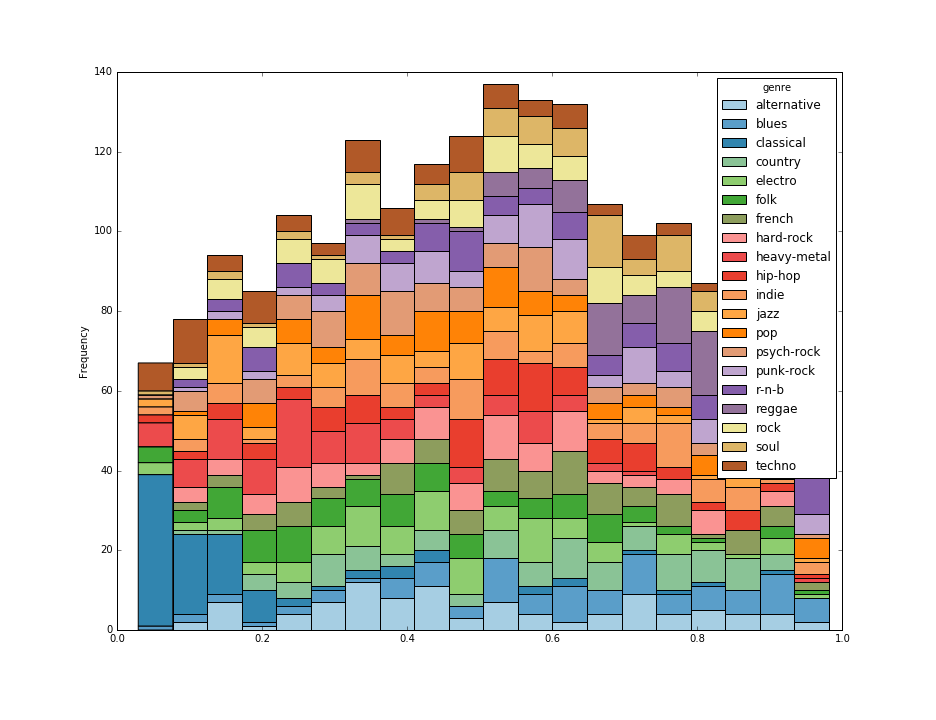

In [286]:
valence = data[['valence']]
valence_genre = data.loc[:,['valence','genre']]

valence_by_genre = valence_genre.pivot(columns='genre', values='valence')
valence_by_genre.plot(kind='hist',stacked=True,colormap='Paired',figsize=[13,10],bins=20)

In [287]:
valence.describe()

,valence
count,2000.000000
mean,0.500070
std,0.248198
min,0.029300
25%,0.305000
50%,0.506000
75%,0.693250
max,0.981000


In [288]:
tmp_val_stats = data.groupby('genre')['valence'].describe().reset_index()
val_stats = tmp_val_stats.pivot(index='genre',columns='level_1',values=None)
val_stats.columns.name = ''
val_stats

valence                                                    \
level_1           25%      50%      75%  count    max      mean     min   
genre                                                                     
alternative  0.334000  0.44400  0.71550  100.0  0.974  0.504010  0.1120   
blues        0.497500  0.64200  0.82650  100.0  0.967  0.627580  0.0718   
classical    0.044475  0.09975  0.17600  100.0  0.894  0.169495  0.0293   
country      0.387500  0.61500  0.75625  100.0  0.930  0.575440  0.1120   
electro      0.324500  0.46050  0.58550  100.0  0.953  0.469022  0.0379   
folk         0.227750  0.37950  0.58800  100.0  0.971  0.410796  0.0337   
french       0.396500  0.56450  0.71100  100.0  0.962  0.552770  0.1000   
hard-rock    0.297000  0.49350  0.62375  100.0  0.927  0.481293  0.0993   
heavy-metal  0.184500  0.27200  0.45325  100.0  0.945  0.318987  0.0361   
hip-hop      0.338500  0.51550  0.65300  100.0  0.946  0.507954  0.0546   
indie        0.355500  0.51800  0.74650  100.0  0.974  0.532066  0.0753   
jazz         0.230250  0.41400  0.58100  100.0  0.940  0.425852  0.0718   
pop          0.332500  0.47150  0.64150  100.0  0.979  0.500480  0.1210   
psych-rock   0.300750  0.42950  0.59275  100.0  0.965  0.463098  0.0602   
punk-rock    0.415500  0.58150  0.73500  100.0  0.964  0.576380  0.1080   
r-n-b        0.398250  0.57850  0.77725  100.0  0.981  0.572550  0.1090   
reggae       0.660500  0.76750  0.86950  100.0  0.976  0.754590  0.3480   
rock         0.314500  0.51150  0.66725  100.0  0.963  0.498907  0.0847   
soul         0.508500  0.67300  0.83400  100.0  0.969  0.655395  0.0415   
techno       0.187750  0.39250  0.57850  100.0  0.972  0.404728  0.0333   

                       
level_1           std  
genre                  
alternative  0.230011  
blues        0.228331  
classical    0.188600  
country      0.217636  
electro      0.209440  
folk         0.221826  
french       0.220674  
hard-rock    0.214392  
heavy-metal  0.183782  
hip-hop      0.213305  
indie        0.238595  
jazz         0.231515  
pop          0.225190  
psych-rock   0.211460  
punk-rock    0.215164  
r-n-b        0.250980  
reggae       0.138612  
rock         0.224661  
soul         0.220173  
techno       0.243715